In [87]:
import importlib
from utils import aspect_extraction, sentiment_extraction, general, embeddings, visualizer
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(embeddings)
importlib.reload(visualizer)

<module 'utils.visualizer' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/visualizer.py'>

In [3]:
def get_query_polarity_percentage(query, aspects_embedding, aspects_adjs, aspects_score, not_query = [], threshold=0.5, verbose=False):
    query_ranking = embeddings.get_query_similarities(
    aspects_embedding, query, not_query=not_query)
    
    query_ranking = pd.concat([aspects_score, query_ranking], axis=1).rename(columns={
        0: "score", 1: "query_similarity"}).sort_values(by=["query_similarity", "score"], ascending=False)
    query_aspects = query_ranking[query_ranking.query_similarity >= threshold].index

    pos, neg, avg_polarity = sentiment_extraction.get_aspects_polarity_percentage(
        query_aspects, aspects_adjs, verbose=verbose)
        
    return pos, neg, avg_polarity, query_aspects, query_ranking

In [4]:
dating_app_polarities = pd.DataFrame(columns=["Aspect", "Tinder", "Bumble", "Hinge"])
dating_app_polarities["Aspect"] = [
                                    "Casual sex pos", 
                                    "Casual sex neg",
                                    "Casual sex avg",
                                    "Relationship pos", 
                                    "Relationship neg",
                                    "Relationship avg",
                                    "Friendship pos", 
                                    "Friendship neg", 
                                    "Friendship avg",
                                    "Curiosity pos",
                                    "Curiosity neg",
                                    "Curiosity avg",
                                    "Women pos",
                                    "Women neg",
                                    "Women avg",
                                    "Men pos",
                                    "Men neg",
                                    "Men avg",
                                    "Self esteem neg",
                                    "Self esteem pos",
                                    "Self esteem avg",
                                    "Appearence pos",
                                    "Appearence neg",
                                    "Appearence avg",
                                    "Intelligence pos",
                                    "Intelligence neg",
                                    "Intelligence avg"
                                ]

In [11]:
queries_aspects = {}

## __Tinder__

In [5]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "tinder")

In [6]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs, app ="tinder")
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq, app="tinder")

In [7]:
tinder_polarities = []

In [23]:
queries_aspects["tinder"] = {}

__Casual sex__

In [8]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.60)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


100%|██████████| 11699/11699 [00:10<00:00, 1110.59it/s]


In [24]:
queries_aspects["tinder"]["casual sex"] = query_aspects.values

In [143]:
print(f"positive: {pos:.2f}%, negative: {neg:.2f}%, avg: {avg:.2f}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

positive: 52.63%, negative: 47.37%, avg: 0.04


In [144]:
query_ranking.head()

score  query_similarity
sex     0.688649          0.812611
sexual  0.719035          0.792364
sexo    0.741144          0.715993
porn    0.727789          0.679251
sexy    0.755898          0.661601

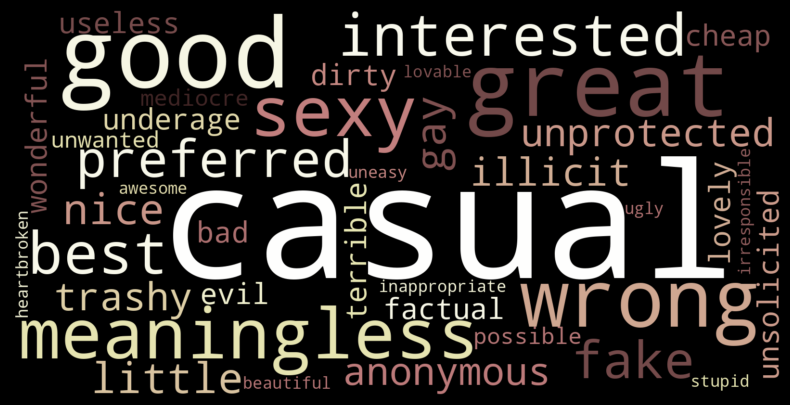

In [145]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [146]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/52 [00:00<?, ?it/s]

['gay', 'great']


In [147]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/107 [00:00<?, ?it/s]

['wrong', 'bad']


__Relationship__

In [26]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.72)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


100%|██████████| 11699/11699 [00:11<00:00, 1017.13it/s]


In [27]:
queries_aspects["tinder"]["relationship"] = query_aspects.values

In [149]:
print(f"positive: {pos:.2f}%, negative: {neg:.2f}%, avg: {avg:.2f}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

positive: 79.84%, negative: 20.16%, avg: 0.35


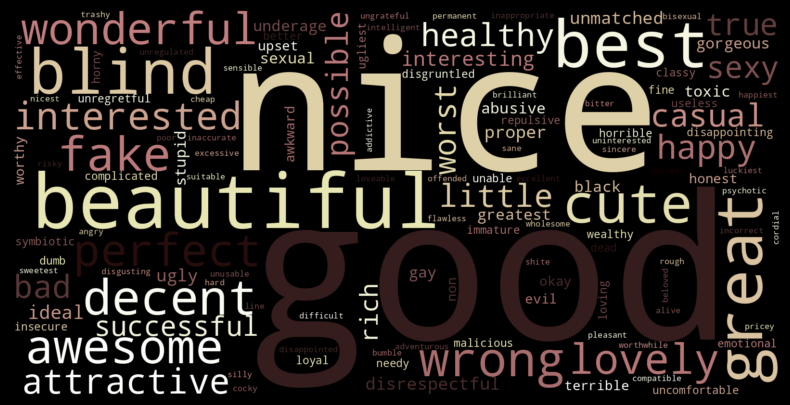

In [150]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [151]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/724 [00:00<?, ?it/s]

['beloved', 'bisexual', 'gay', 'worthy', 'great']
['good', 'better']
['interested', 'interesting']
['happy', 'happiest']
['like', 'ideal']


In [152]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/277 [00:00<?, ?it/s]

['poor', 'blind', 'needy', 'dead']
['stupid', 'silly', 'psychotic']
['difficult', 'hard']
['wrong', 'bad']
['disappointed', 'disappointing']
['ugliest', 'ugly']


__Friendship__

In [30]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg : {avg}")

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


100%|██████████| 11699/11699 [00:11<00:00, 975.85it/s]


positive: 93.08, negative: 6.92, avg : 0.48731086392025535


In [31]:
queries_aspects["tinder"]["frienship"] = query_aspects.values

In [154]:
tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

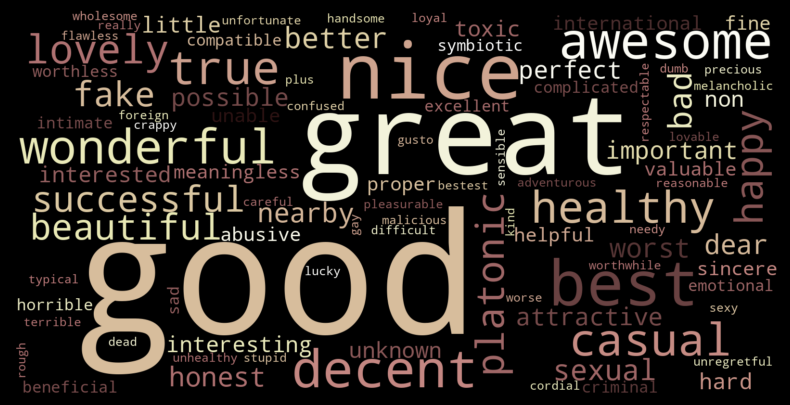

In [155]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [156]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/979 [00:00<?, ?it/s]

['dear', 'intimate', 'gay', 'great']
['plus', 'good', 'better']
['reasonable', 'sensible']
['interested', 'interesting']
['kind', 'like']


In [157]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/151 [00:00<?, ?it/s]

['criminal', 'unfortunate', 'melancholic', 'stupid']
['difficult', 'hard']
['worse', 'bad']
['needy', 'dead']
['unknown', 'rough']


__Curiosity__

In [32]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


100%|██████████| 11699/11699 [00:12<00:00, 944.58it/s]


In [33]:
queries_aspects["tinder"]["curiosity"] = query_aspects.values

In [159]:
print(f"positive: {pos:.2f}, negative: {neg:2f}, avg: {avg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

positive: 27.59, negative: 72.413793, avg: -0.2389876767576933


In [160]:
query_ranking.head()

score  query_similarity
innovation  0.767460          0.800823
marketing   0.691112          0.769475
technology  0.717650          0.759639
insights    0.736034          0.733622
social      0.730320          0.712820

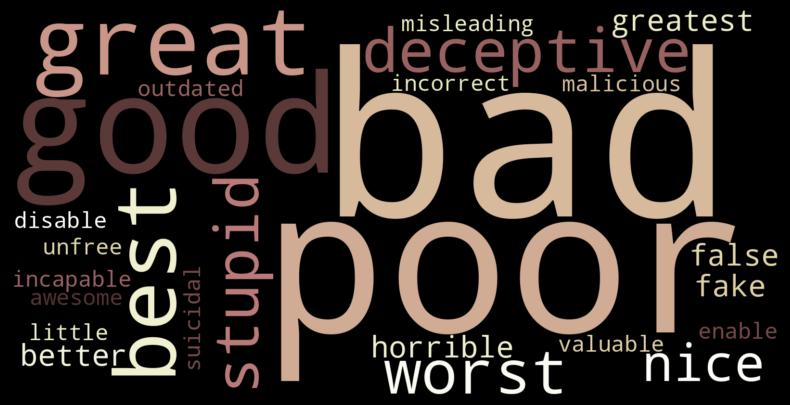

In [161]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [162]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/25 [00:00<?, ?it/s]

['good', 'better']


In [163]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/51 [00:00<?, ?it/s]

__Women__

In [34]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.74)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']


100%|██████████| 11699/11699 [00:11<00:00, 981.18it/s]


positive: 70.91, negative: 29.09, avg: 0.2725763359167602


In [35]:
queries_aspects["tinder"]["women"] = query_aspects.values

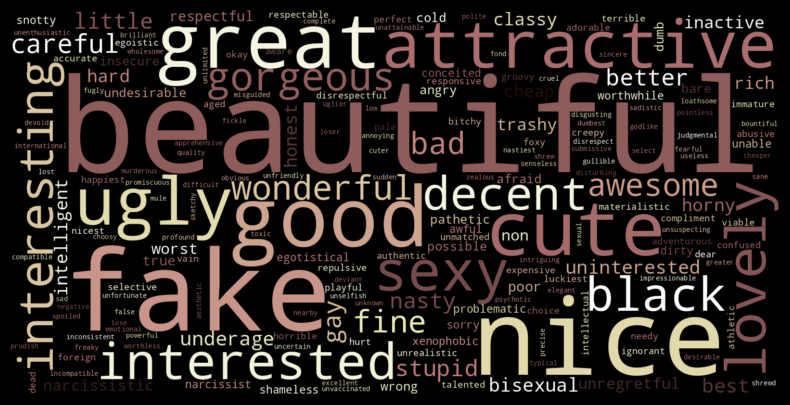

In [165]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [166]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/1757 [00:00<?, ?it/s]

['deviant', 'intellectual', 'narcissist', 'bisexual', 'dear', 'gay', 'great']
['quality', 'good', 'better']
['compliment', 'okay']
['interested', 'interesting']
['choice', 'possible']
['cuter', 'cute']
['rich', 'aged']
['hornier', 'horny']


In [167]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/804 [00:00<?, ?it/s]

['undesirable', 'psychotic', 'shrew', 'unfortunate', 'loser', 'stupid']
['poor', 'needy', 'lost', 'dead']
['cheap', 'cheaper']
['nastiest', 'nasty']
['difficult', 'hard']
['uglier', 'ugly']
['wrong', 'bad']
['cold', 'hurt']
['vain', 'conceited']
['dumb', 'dumbest']


__Men__

In [36]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


100%|██████████| 11699/11699 [00:10<00:00, 1089.36it/s]


In [37]:
queries_aspects["tinder"]["men"] = query_aspects.values

In [169]:
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

positive: 74.46, negative: 25.54, avg: 0.2603492047492943


In [170]:
query_ranking.head()

score  query_similarity
dude  0.760761          0.913715
boy   0.790201          0.886162
guy   0.900945          0.868454
man   0.894146          0.840760
bro   0.736641          0.836664

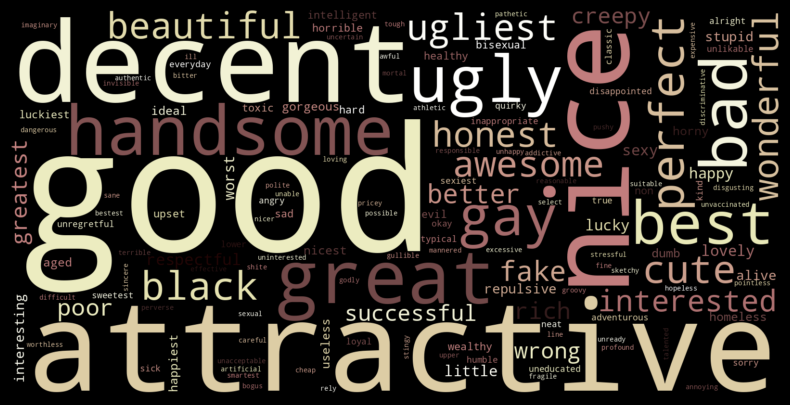

In [171]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [172]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1002 [00:00<?, ?it/s]

['bisexual', 'gay', 'great']
['good', 'better']
['happy', 'happiest']
['luckiest', 'lucky']
['sexy', 'sexiest']
['nicer', 'nicest']
['kind', 'ideal']
['interested', 'interesting']
['rich', 'aged']


In [173]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/322 [00:00<?, ?it/s]

['mortal', 'homeless', 'tough', 'stupid']
['ugliest', 'ugly']
['wrong', 'bad']
['sick', 'poor']
['ill', 'upset']
['annoying', 'evil']
['difficult', 'hard']


__Self Esteem__

In [38]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.75)

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


100%|██████████| 11699/11699 [00:12<00:00, 948.45it/s]


In [39]:
queries_aspects["tinder"]["self esteem"] = query_aspects.values

In [175]:
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

positive: 54.55, negative: 45.45, avg: 0.06404271852128217


In [176]:
query_ranking.head()

score  query_similarity
self        0.728801          0.862039
yourself    0.729885          0.850462
myself      0.715372          0.794236
confidence  0.742466          0.780320
esteem      0.734661          0.756709

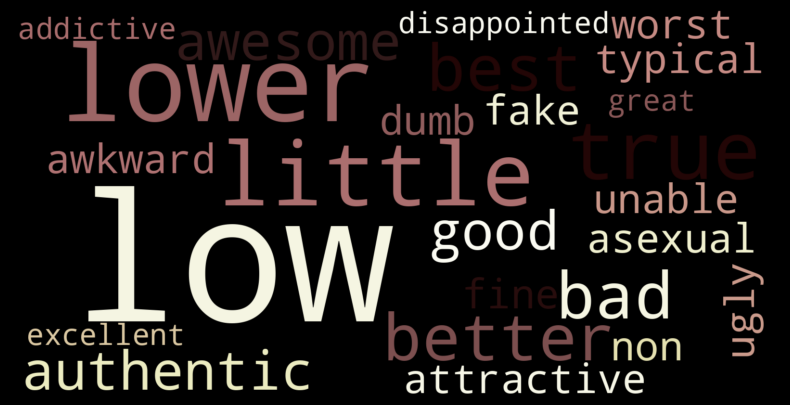

In [177]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [178]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/22 [00:00<?, ?it/s]

['good', 'better']


In [179]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/77 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [41]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.55)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


100%|██████████| 11699/11699 [00:12<00:00, 967.08it/s]


positive: 48.72, negative: 51.28, avg: -0.004971058944043975


In [42]:
queries_aspects["tinder"]["attractiveness"] = query_aspects.values

In [181]:
query_ranking.head()

score  query_similarity
appearance      0.730676          0.774414
personality     0.767413          0.741813
attractiveness  0.721867          0.695761
stupidity       0.736286          0.656400
perception      0.709344          0.581319

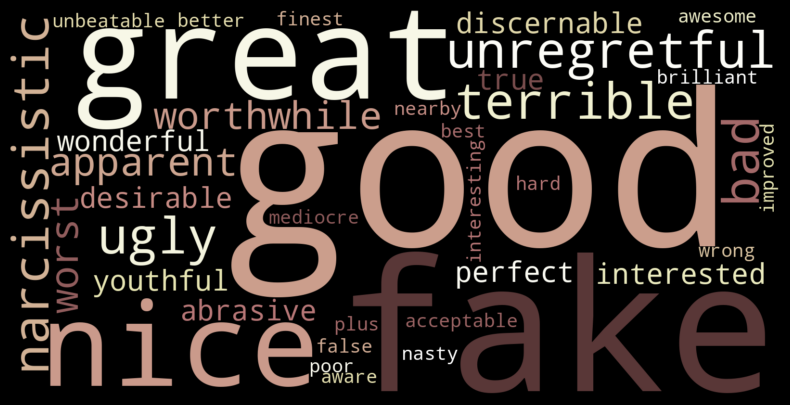

In [182]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [183]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/41 [00:00<?, ?it/s]

['plus', 'good', 'better']
['interested', 'interesting']


In [184]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/28 [00:00<?, ?it/s]

['wrong', 'bad']


__Attractiveness (intelligence)__

In [44]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.6)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

tinder_polarities.append(pos)
tinder_polarities.append(neg)
tinder_polarities.append(avg)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


100%|██████████| 11699/11699 [00:12<00:00, 920.85it/s]


positive: 26.01626016260163, negative: 73.98373983739837, avg: -0.27516819547281407


In [45]:
queries_aspects["tinder"]["intelligence"] = query_aspects.values

In [186]:
query_ranking.head()

score  query_similarity
intelligent   0.731253          0.778345
intelligence  0.718626          0.716737
knowledge     0.737076          0.700541
humour        0.728598          0.689580
wise          0.708130          0.668579

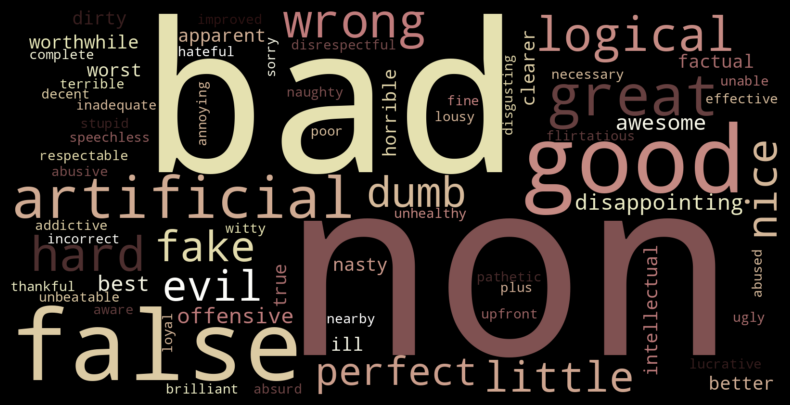

In [187]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [188]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/68 [00:00<?, ?it/s]

['plus', 'good', 'better']
['intellectual', 'great']


In [189]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/180 [00:00<?, ?it/s]

['annoying', 'offensive', 'evil']
['wrong', 'bad']


In [190]:
dating_app_polarities["Tinder"] = tinder_polarities

## __Bumble__

In [191]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "bumble")

In [192]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs, app = "bumble")
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq, app = "bumble")

In [193]:
bumble_polarities = []

In [47]:
queries_aspects["bumble"] = {}

__Casual sex__

In [49]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.5)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


100%|██████████| 11699/11699 [00:10<00:00, 1071.03it/s]


In [50]:
queries_aspects["bumble"]["casual sex"] = query_aspects.values

In [195]:
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

positive: 68.75, negative: 31.25, avg: 0.22964395811340838


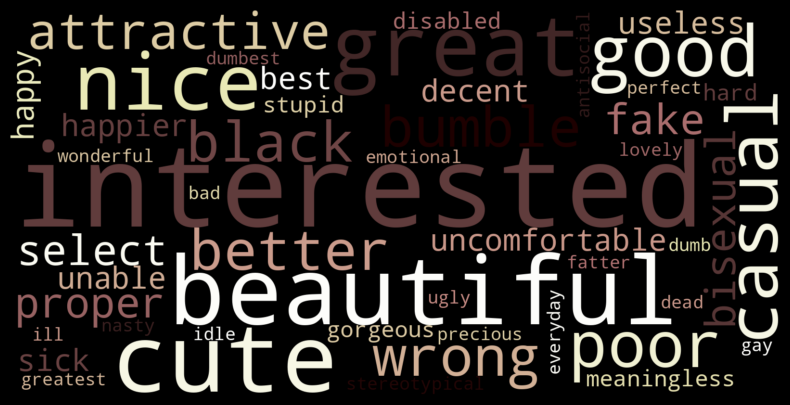

In [196]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [197]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/80 [00:00<?, ?it/s]

['bisexual', 'gay', 'great']
['good', 'better']
['happy', 'happier']


In [198]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/51 [00:00<?, ?it/s]

['sick', 'poor', 'disabled', 'dead']
['wrong', 'bad']
['dumb', 'dumbest']


__Relationship__

In [51]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.72)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


100%|██████████| 11699/11699 [00:12<00:00, 966.75it/s]


In [52]:
queries_aspects["bumble"]["relationship"] = query_aspects.values

In [200]:
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

positive: 70.80, negative: 29.20, avg: 0.23161312560978997


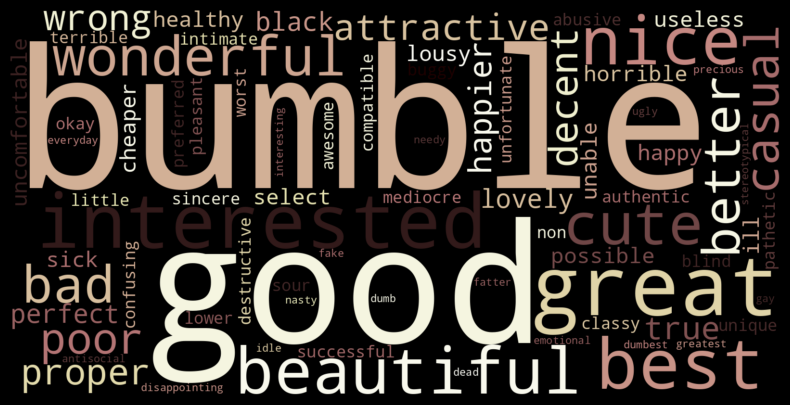

In [201]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [202]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/159 [00:00<?, ?it/s]

['intimate', 'gay', 'great']
['good', 'better']
['happy', 'happier']
['interested', 'interesting']


In [203]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/99 [00:00<?, ?it/s]

['blind', 'needy', 'dead', 'sick', 'poor']
['wrong', 'bad']
['dumb', 'dumbest']


__Friendship__

In [53]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.68)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


100%|██████████| 11699/11699 [00:12<00:00, 970.55it/s]


In [54]:
queries_aspects["bumble"]["friendship"] = query_aspects.values

In [205]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

positive: 72.20367278797997, negative: 27.79632721202003, avg: 0.24692714728332182


In [206]:
query_ranking.head()

score  query_similarity
relationships  0.767987          0.874245
relationship   0.783984          0.821643
friendship     0.658832          0.785669
friends        0.849506          0.766438
friendships    0.710590          0.758929

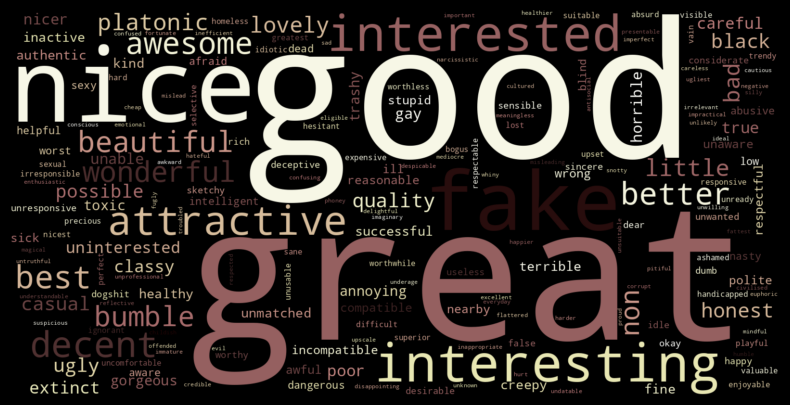

In [207]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [208]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1636 [00:00<?, ?it/s]

['great', 'dear', 'gay', 'worthy', 'superior']
['quality', 'good', 'better']
['kind', 'like', 'ideal']
['cautious', 'rich', 'elderly']
['happy', 'happier']
['interested', 'interesting']
['reasonable', 'sensible']
['nicer', 'nicest']


In [209]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/758 [00:00<?, ?it/s]

['blind', 'lost', 'dead', 'sick', 'poor', 'handicapped']
['wrong', 'worse', 'bad']
['difficult', 'harder', 'hard']
['ill', 'upset', 'hurt']
['homeless', 'silly', 'stupid']
['confusing', 'confused']
['ugliest', 'ugly']
['annoying', 'evil']
['mislead', 'misleading']


__Curiosity__

In [55]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


100%|██████████| 11699/11699 [00:12<00:00, 968.57it/s]


In [56]:
queries_aspects["bumble"]["curiosity"] = query_aspects.values

In [211]:
print("no relevant aspects")
query_ranking.head()

no relevant aspects


score  query_similarity
innovation   0.683675          0.800823
marketing    0.661105          0.769475
technology   0.662968          0.759639
insights     0.685371          0.733622
development  0.657567          0.710748

In [212]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(np.nan)
bumble_polarities.append(np.nan)
bumble_polarities.append(np.nan)

positive: 47.368421052631575, negative: 52.63157894736842


__Women__

In [57]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"],aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.74)
print(f"positive: {pos}, negative: {neg}")

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']


100%|██████████| 11699/11699 [00:12<00:00, 933.59it/s]


positive: 70.90810222947253, negative: 29.09189777052746


In [58]:
queries_aspects["bumble"]["women"] = query_aspects.values

In [214]:
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

In [215]:
query_ranking.head()

score  query_similarity
women    0.646368          0.917901
girls    0.656983          0.855811
ladies   0.923021          0.818926
females  0.662736          0.801617
chicks   0.621706          0.740175

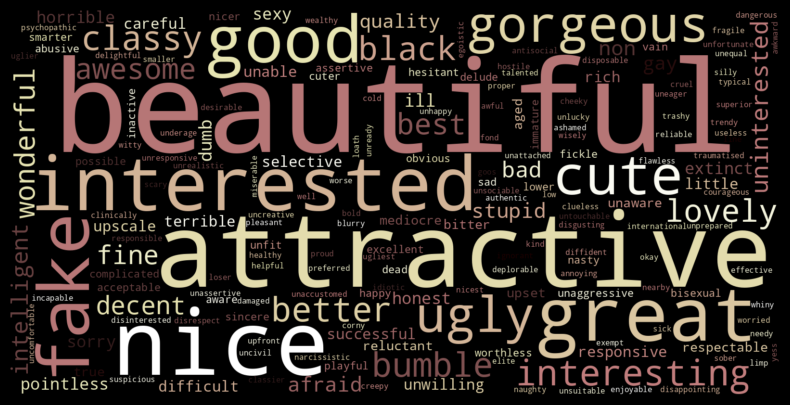

In [216]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [217]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1021 [00:00<?, ?it/s]

['superior', 'bisexual', 'gay', 'great']
['quality', 'good', 'better']
['rich', 'elite', 'aged']
['interested', 'interesting']
['cuter', 'cute']
['kind', 'like']
['well', 'disposable']
['classier', 'classy']
['nicer', 'nicest']


In [218]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/422 [00:00<?, ?it/s]

['silly', 'untouchable', 'unfortunate', 'loser', 'stupid']
['sick', 'needy', 'dead']
['uglier', 'ugly', 'ugliest']
['loath', 'reluctant']
['worse', 'bad']
['ill', 'upset']


__Men__

In [59]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


100%|██████████| 11699/11699 [00:11<00:00, 1029.73it/s]


In [60]:
queries_aspects["bumble"]["men"] = query_aspects.values

In [220]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

positive: 67.3913043478261, negative: 32.608695652173914, avg: 0.16772172126683402


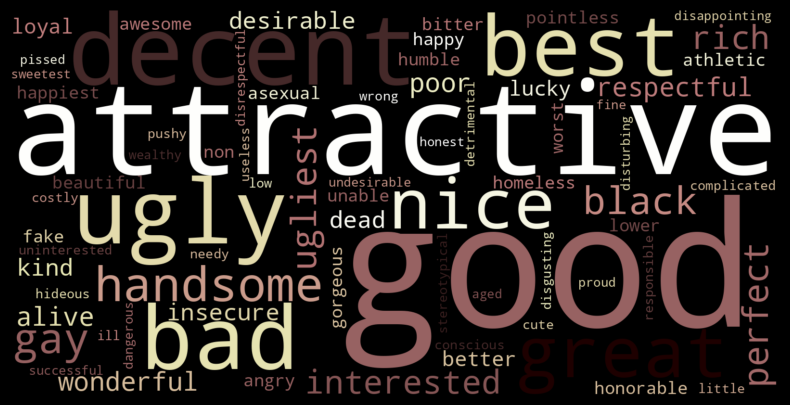

In [221]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [222]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/351 [00:00<?, ?it/s]

['good', 'better']
['gay', 'great']
['rich', 'aged']
['kind', 'like']
['happy', 'happiest']
['honest', 'honorable']


In [223]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/146 [00:00<?, ?it/s]

['poor', 'needy', 'dead']
['ugliest', 'ugly']
['wrong', 'bad']
['homeless', 'undesirable']


__Self esteem__

In [61]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.75)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


100%|██████████| 11699/11699 [00:12<00:00, 911.43it/s]

positive: 54.54545454545454, negative: 45.45454545454545, avg: 0.06404271852128217


In [62]:
queries_aspects["bumble"]["self esteem"] = query_aspects.values

In [225]:
query_ranking.head()

score  query_similarity
self        0.667719          0.862039
myself      0.658253          0.794236
confidence  0.659440          0.780320
esteem      0.627702          0.756709
them        0.655270          0.686078

too few data


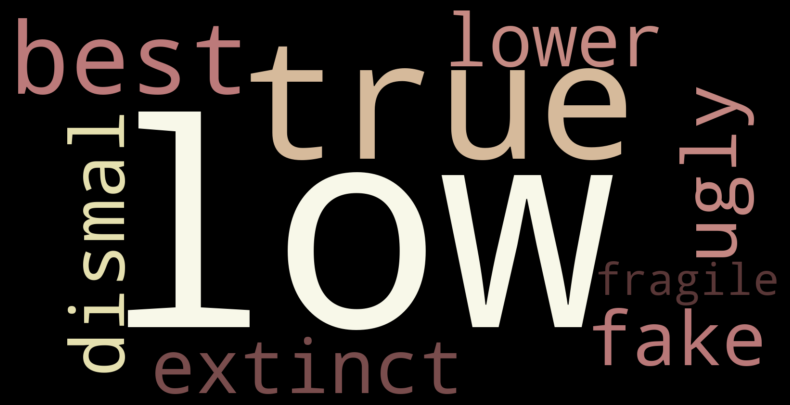

In [226]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)
bumble_polarities.append(np.nan)
bumble_polarities.append(np.nan)
bumble_polarities.append(np.nan)

In [227]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/4 [00:00<?, ?it/s]

In [228]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/18 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [63]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


100%|██████████| 11699/11699 [00:12<00:00, 971.16it/s]


In [64]:
queries_aspects["bumble"]["attractiveness"] = query_aspects.values

In [230]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

positive: 68.42105263157895, negative: 31.57894736842105, avg: 0.15974176752040528


In [231]:
query_ranking.head()[:30]

score  query_similarity
appearance      0.644547          0.774414
personality     0.706103          0.741813
attractiveness  0.640983          0.695761
stupidity       0.673023          0.656400
beauty          0.674272          0.561083

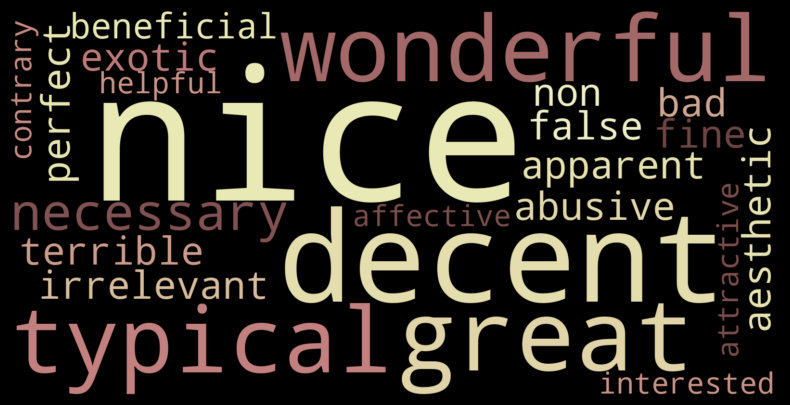

In [232]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [233]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/30 [00:00<?, ?it/s]

In [234]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/6 [00:00<?, ?it/s]

__Attractiveness (intelligence)__

In [65]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"],aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.6)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


100%|██████████| 11699/11699 [00:13<00:00, 891.86it/s]


positive: 26.01626016260163, negative: 73.98373983739837, avg: -0.27516819547281407


In [66]:
queries_aspects["bumble"]["intelligence"] = query_aspects.values

In [236]:
bumble_polarities.append(pos)
bumble_polarities.append(neg)
bumble_polarities.append(avg)

In [237]:
query_ranking.head()

score  query_similarity
intelligence   0.663915          0.716737
knowledge      0.636754          0.700541
wise           0.658084          0.668579
sense          0.720696          0.632691
understanding  0.665585          0.621662

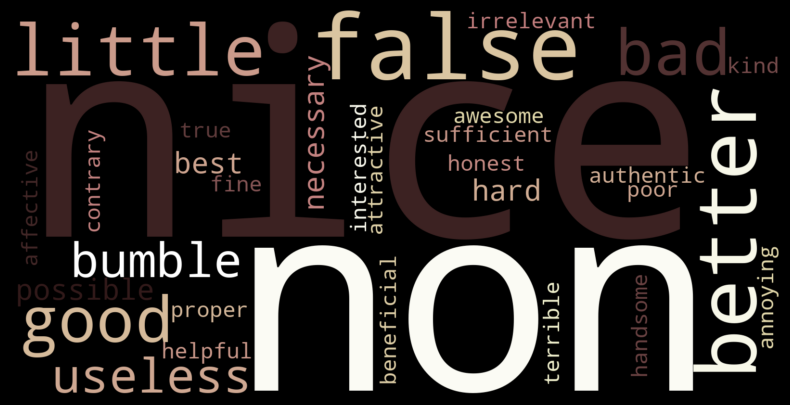

In [238]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [239]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/37 [00:00<?, ?it/s]

['good', 'better']


In [240]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/52 [00:00<?, ?it/s]

In [241]:
dating_app_polarities["Bumble"] = bumble_polarities

## __Hinge__

In [242]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "hinge")

In [243]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs, app ="hinge")
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq, app="hinge")

In [244]:
hinge_polarities = []

In [67]:
queries_aspects["hinge"] = {}

__Casual sex__

In [69]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.60)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


100%|██████████| 11699/11699 [00:11<00:00, 1024.71it/s]


In [70]:
queries_aspects["hinge"]["casual sex"] = query_aspects.values

In [246]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")


positive: 50.0, negative: 50.0, avg: 0.005208333333333343


In [247]:
query_ranking.head()

score  query_similarity
sex      0.337593          0.812611
lesbian  0.357330          0.612015
gay      0.343410          0.589886
fetish   0.349358          0.544196
adult    0.347150          0.529873

too few data


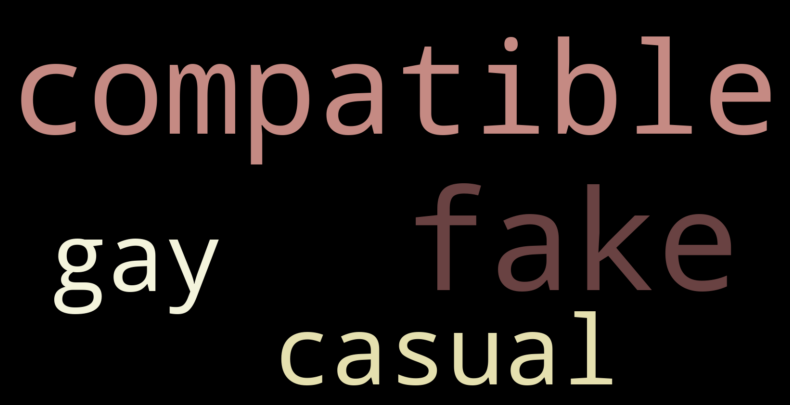

In [248]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)

__Relationship__

In [71]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.73)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


100%|██████████| 11699/11699 [00:11<00:00, 988.16it/s]


In [72]:
queries_aspects["hinge"]["relationship"] = query_aspects.values

In [250]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)
hinge_polarities.append(avg)

positive: 62.06896551724138, negative: 37.93103448275862, avg: 0.13155545559451615


In [251]:
query_ranking.head()

score  query_similarity
married       0.350399          0.822804
relationship  0.437403          0.818718
boyfriend     0.367113          0.805093
couple        0.383327          0.793299
husband       0.366603          0.780680

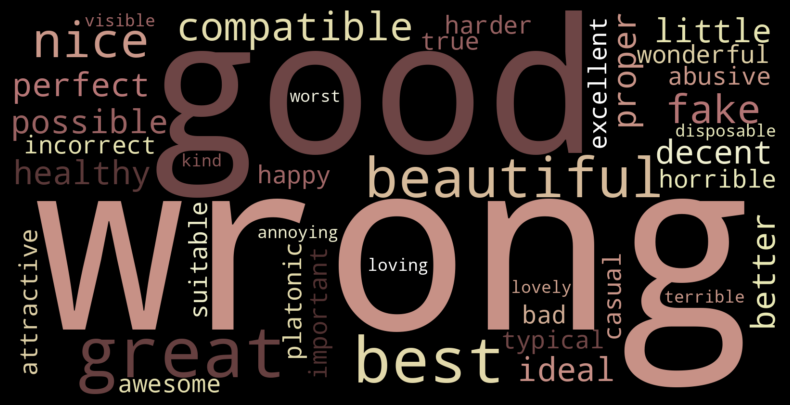

In [252]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [253]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/58 [00:00<?, ?it/s]

['good', 'better']
['kind', 'ideal']


In [254]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/33 [00:00<?, ?it/s]

['wrong', 'bad']


__Friendship__

In [73]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.69)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


100%|██████████| 11699/11699 [00:12<00:00, 961.30it/s]


In [74]:
queries_aspects["hinge"]["friendship"] = query_aspects.values

In [256]:
query_ranking.head()

score  query_similarity
relationships  0.393510          0.874245
relationship   0.437403          0.821643
friendship     0.345118          0.785669
friends        0.408134          0.766438
friendships    0.356517          0.758929

In [257]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)
hinge_polarities.append(avg)

positive: 75.79281183932348, negative: 24.207188160676534, avg: 0.2623064713546836


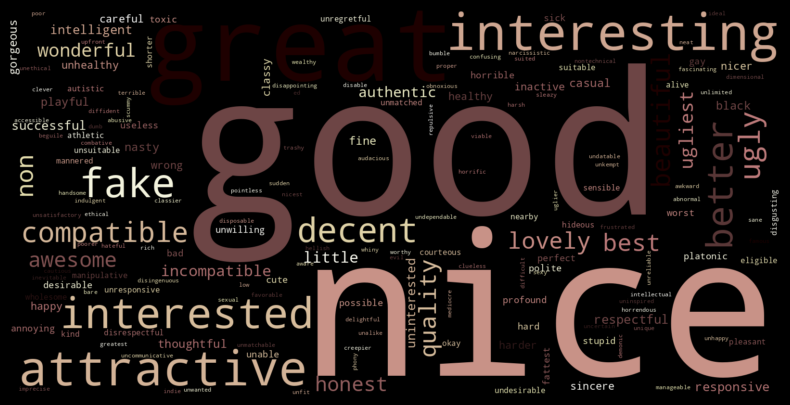

In [258]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [259]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1244 [00:00<?, ?it/s]

['intellectual', 'gay', 'worthy', 'great']
['quality', 'good', 'better']
['kind', 'like', 'ideal']
['interested', 'interesting']
['cautious', 'rich']
['nicer', 'nicest']
['classier', 'classy']


In [260]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/452 [00:00<?, ?it/s]

['difficult', 'harder', 'hard']
['uglier', 'ugly', 'ugliest']
['frustrated', 'disappointing']
['wrong', 'bad']
['horrendous', 'terrible']
['annoying', 'evil']
['undesirable', 'stupid']
['sick', 'poor']
['horrific', 'hideous']
['worst', 'inevitable']


__Curiosity__

In [75]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


100%|██████████| 11699/11699 [00:12<00:00, 919.61it/s]


In [76]:
queries_aspects["hinge"]["curiosity"] = query_aspects.values

In [262]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 33.33333333333333, negative: 66.66666666666666, avg: -0.23152038593215066


In [263]:
print("no relevant data")

hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)

query_ranking.head()

no relevant data


score  query_similarity
innovation   0.351152          0.800823
marketing    0.329376          0.769475
technology   0.351439          0.759639
development  0.323791          0.710748
discovery    0.349149          0.705888

__Women__

In [77]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.74)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']


100%|██████████| 11699/11699 [00:11<00:00, 1002.54it/s]


positive: 70.90810222947253, negative: 29.09189777052746, avg: 0.2725763359167602


In [78]:
queries_aspects["hinge"]["women"] = query_aspects.values

In [265]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)
hinge_polarities.append(avg)

positive: 70.47619047619048, negative: 29.523809523809526


In [266]:
query_ranking.head()

score  query_similarity
women    0.575804          0.917901
girls    0.523793          0.855811
ladies   0.394191          0.818926
females  0.332899          0.801617
chicks   0.358825          0.740175

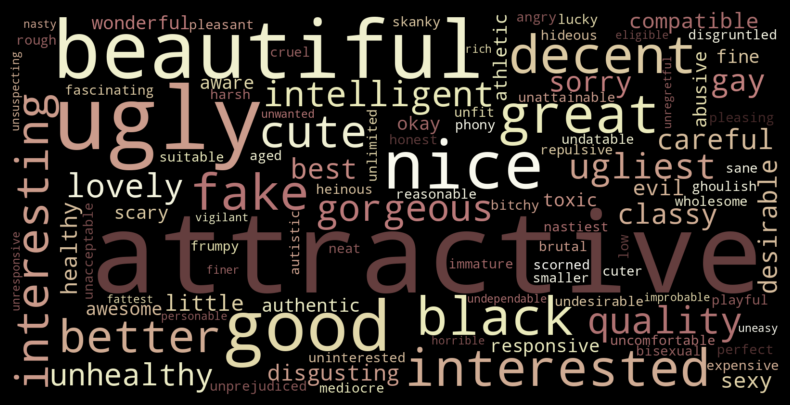

In [267]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [268]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/426 [00:00<?, ?it/s]

['quality', 'good', 'better']
['bisexual', 'gay', 'great']
['interested', 'interesting']
['rich', 'aged']
['cuter', 'cute']


In [269]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/178 [00:00<?, ?it/s]

['brutal', 'cruel']
['ugliest', 'ugly']
['nastiest', 'nasty']


__Men__

In [79]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


100%|██████████| 11699/11699 [00:10<00:00, 1091.12it/s]


In [80]:
queries_aspects["hinge"]["men"] = query_aspects.values

In [271]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)
hinge_polarities.append(avg)

positive: 85.04672897196261, negative: 14.953271028037381, avg: 0.34313201594898124


In [272]:
query_ranking.head()

score  query_similarity
dude  0.377032          0.913715
boy   0.341643          0.886162
guy   0.524169          0.868454
man   0.449236          0.840760
bro   0.346085          0.836664

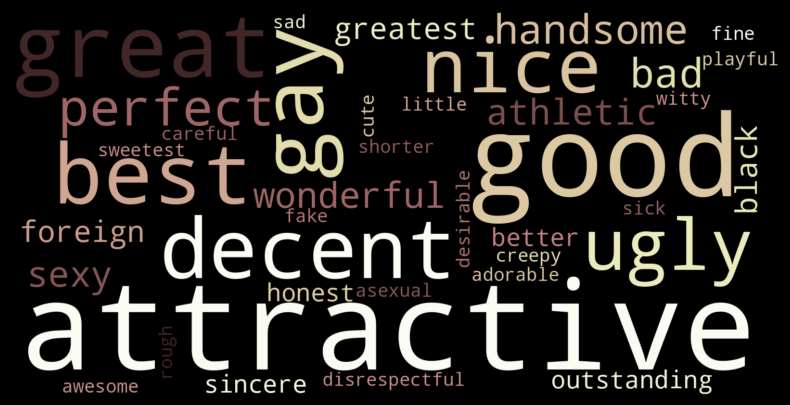

In [273]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [274]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/145 [00:00<?, ?it/s]

['good', 'better']
['gay', 'great']


In [275]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/24 [00:00<?, ?it/s]

__Self esteem__

In [81]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.75)
print(f"positive: {pos}, negative: {neg}")

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


100%|██████████| 11699/11699 [00:12<00:00, 963.59it/s]


positive: 54.54545454545454, negative: 45.45454545454545


In [82]:
queries_aspects["hinge"]["self esteem"] = query_aspects.values

In [277]:
query_ranking.head()

score  query_similarity
self        0.366936          0.862039
myself      0.348597          0.794236
confidence  0.338839          0.780320
esteem      0.331798          0.756709
them        0.356207          0.686078

too few data


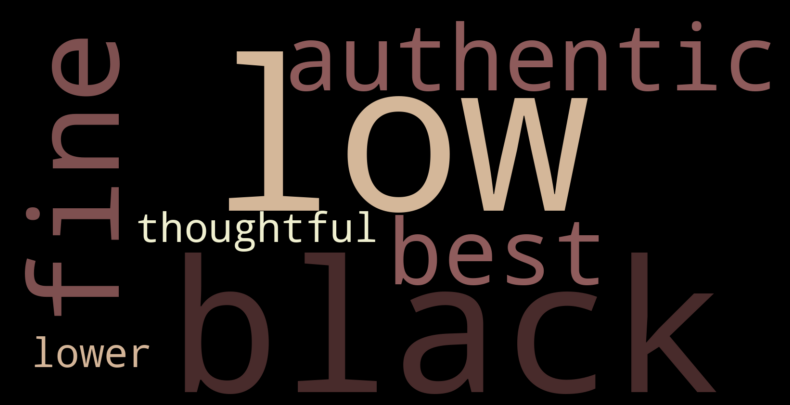

In [278]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)
hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)

__Attractiveness (appearence)__

In [83]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


100%|██████████| 11699/11699 [00:12<00:00, 967.81it/s]


In [84]:
queries_aspects["hinge"]["attractiveness"] = query_aspects.values

In [280]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)
hinge_polarities.append(avg)

positive: 83.33333333333334, negative: 16.666666666666664, avg: 0.3348004938271605


In [281]:
query_ranking.head()

score  query_similarity
appearance      0.349813          0.774414
personality     0.372749          0.741813
attractiveness  0.342046          0.695761
beauty          0.346743          0.561083
ability         0.406160          0.550966

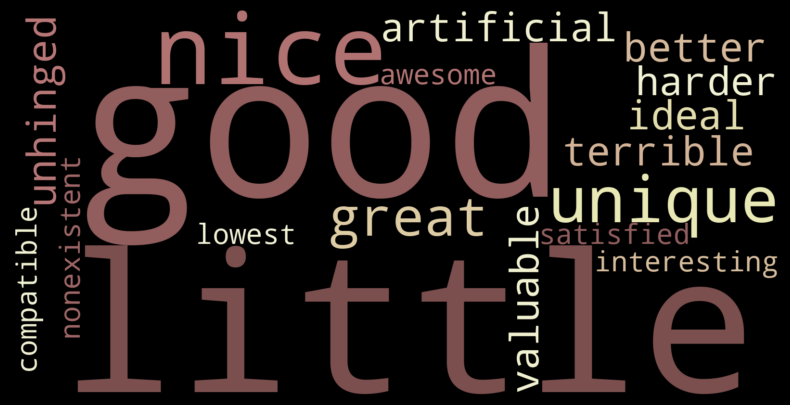

In [282]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [283]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/20 [00:00<?, ?it/s]

['good', 'better']
['like', 'ideal']


In [284]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/11 [00:00<?, ?it/s]

__Attractiveness (intelligence)__

In [85]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"],aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.6)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


100%|██████████| 11699/11699 [00:13<00:00, 881.80it/s]


In [86]:
queries_aspects["hinge"]["intelligence"] = query_aspects.values

In [286]:
print(f"positive: {pos}, negative: {neg}, avg: {avg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)
hinge_polarities.append(avg)

positive: 84.61538461538461, negative: 15.384615384615385, avg: 0.3773059782592136


In [287]:
query_ranking.head()

score  query_similarity
intelligence   0.351852          0.716737
knowledge      0.338011          0.700541
wise           0.339466          0.668579
sense          0.374515          0.632691
understanding  0.369933          0.621662

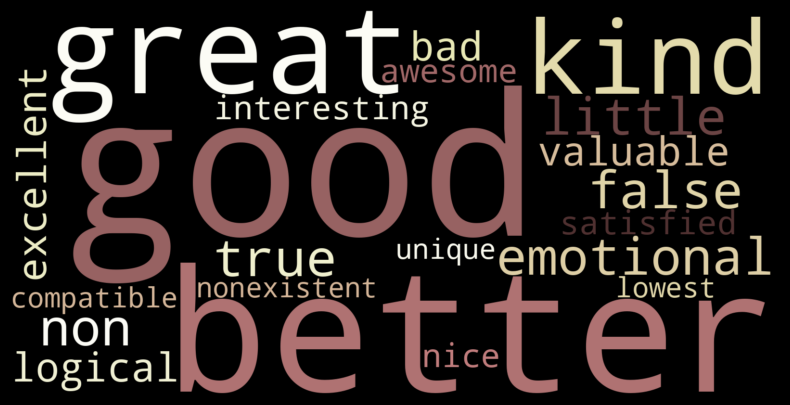

In [288]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [289]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/32 [00:00<?, ?it/s]

['good', 'better']
['kind', 'like']


In [290]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/11 [00:00<?, ?it/s]

In [291]:
dating_app_polarities["Hinge"] = hinge_polarities

In [292]:
dating_app_polarities.to_pickle("data/dating_apps_polarity.pickle")

In [90]:
with open("data/lexicon_query_aspects.pickle", "wb+") as f:
    pickle.dump(queries_aspects, f)

## __Comparing__

In [397]:
dating_app_polarities = pd.read_pickle("data/dating_apps_polarity.pickle")
dating_app_polarities.head()

Aspect     Tinder     Bumble      Hinge
0    Casual sex pos  52.631579  68.750000        NaN
1    Casual sex neg  47.368421  31.250000        NaN
2    Casual sex avg   0.043843   0.229644        NaN
3  Relationship pos  79.840000  70.802920  62.068966
4  Relationship neg  20.160000  29.197080  37.931034

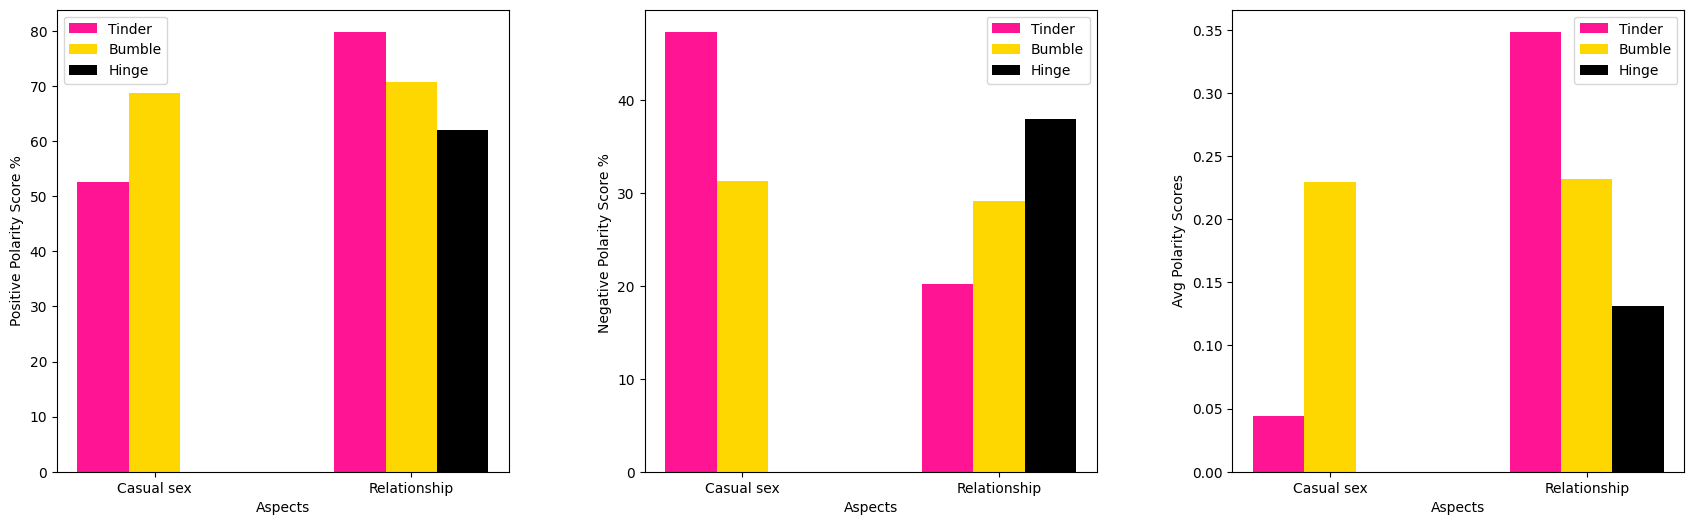

In [439]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects = ["Casual sex", "Relationship"], figsize=(21,6))

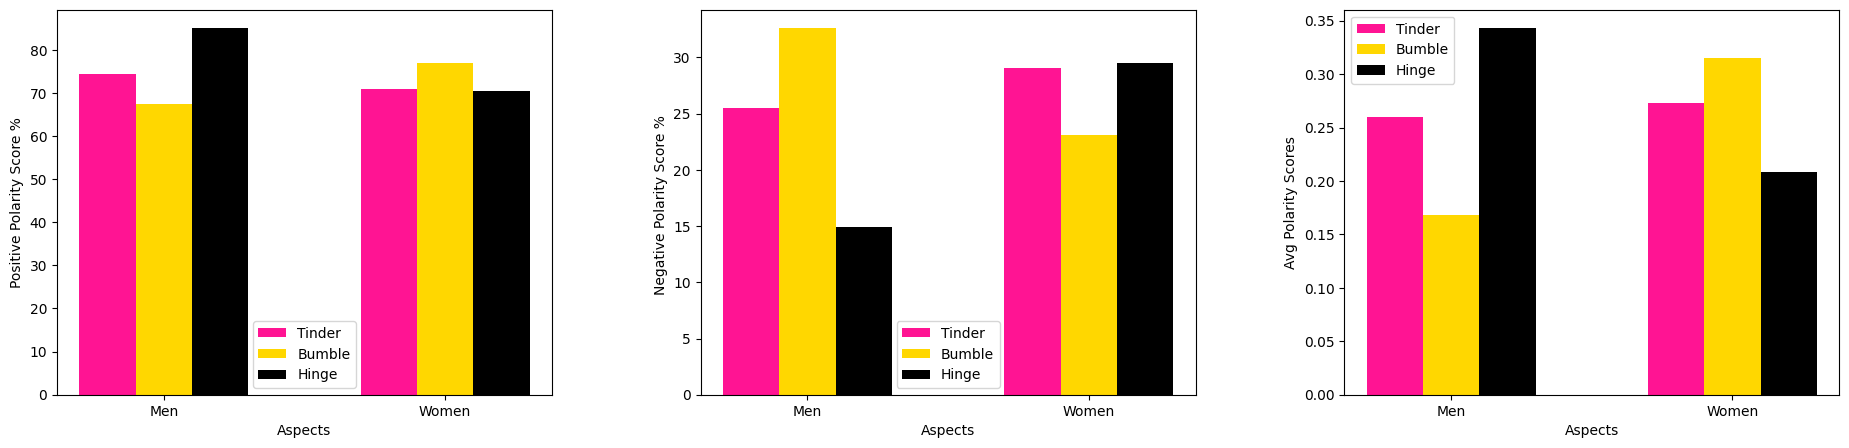

In [447]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["Men", "Women"], figsize=(23,5))

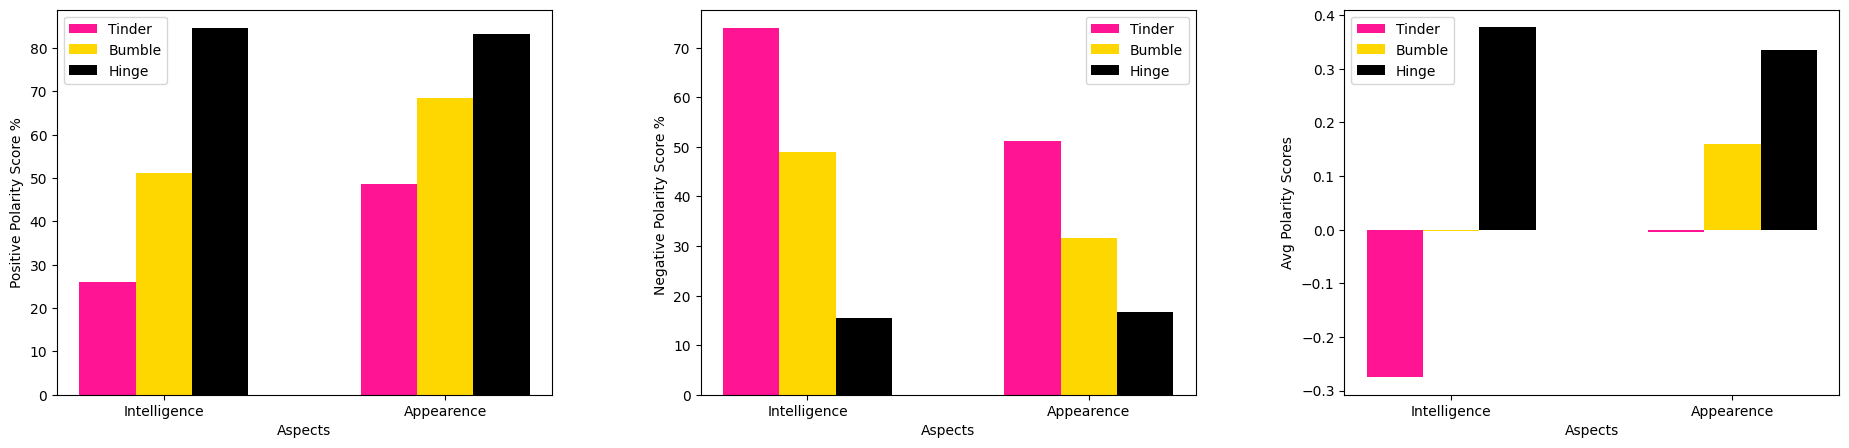

In [449]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["Intelligence", "Appearence"], figsize=(23,5))

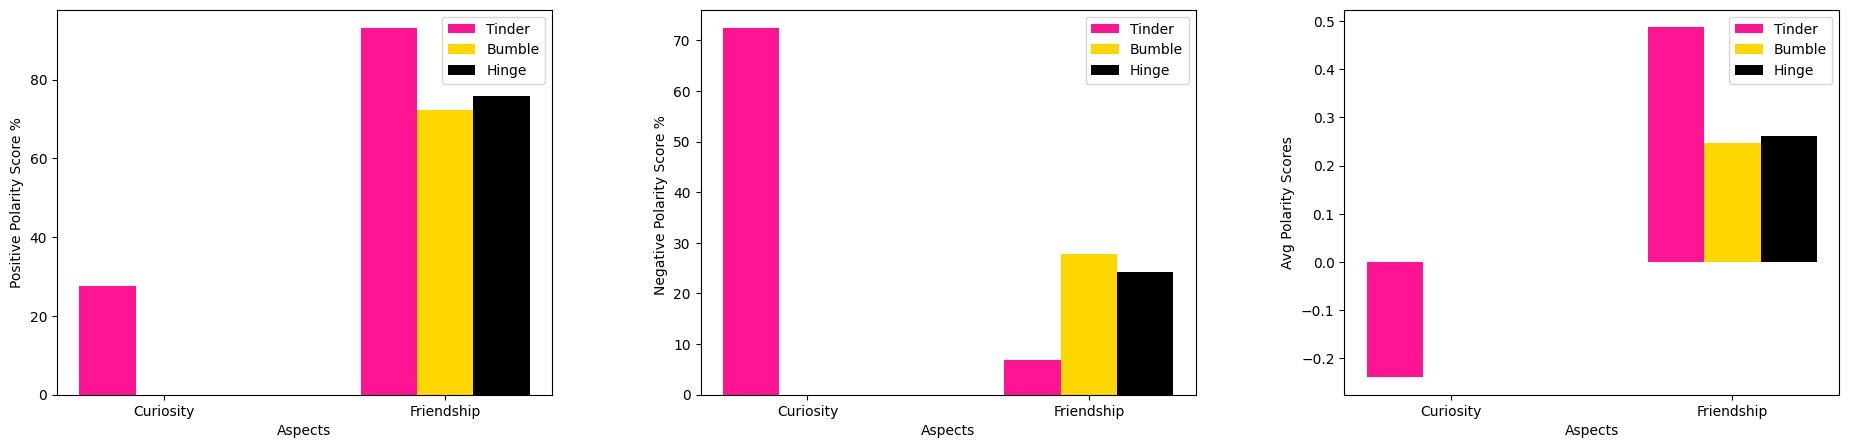

In [450]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["Curiosity", "Friendship"], figsize=(23,5))